# Importing the required modules

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import os
import random as r
import matplotlib.image as mpimg

In [40]:
class Dataset:

    def __init__(self, dataset_path : str):
        self.PARENT = dataset_path
        self.class_distribution = dict()
    
    def __compute_class_distributions(self):
        for dirname in os.listdir(self.PARENT):
            self.class_distribution[dirname] = len(os.listdir(os.path.join(self.PARENT, dirname)))

    def class_distributions(self):
        self.__compute_class_distributions()

        plt.figure(figsize=(10,10))
        plt.bar(self.class_distribution.keys(),
        self.class_distribution.values(),
        color=["crimson","red","orange","yellow"])
        plt.xticks(rotation=90)
        plt.title("Class Distribution of PlantVillage dataset")
        plt.xlabel("Class Label")
        plt.ylabel("Frequency of class")
        plt.show()

    def show_class_samples(self):
        rows = 2
        columns = 3
        c = 0
        fig, axs = plt.subplots(rows, columns,figsize=(15,15))
        for dirname in os.listdir(self.PARENT):
            img_path = r.choice(os.listdir(os.path.join(self.PARENT, dirname)))
            image = mpimg.imread(os.path.join(self.PARENT, dirname, img_path))
            axs[c//columns, c%columns].imshow(image, cmap="gray")
            axs[c//columns, c%columns].set_title(dirname)
            c += 1
        fig.suptitle("Image Samples of Medical MNIST dataset")
        plt.subplots_adjust(bottom=0.45, top=0.9, hspace=0.2)
        plt.show()

In [41]:
mnist = Dataset("medical-mnist")

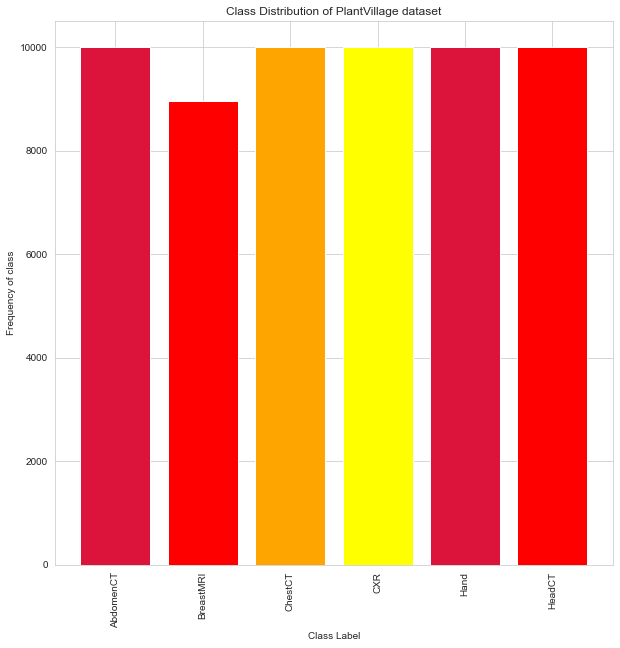

In [42]:
mnist.class_distributions()

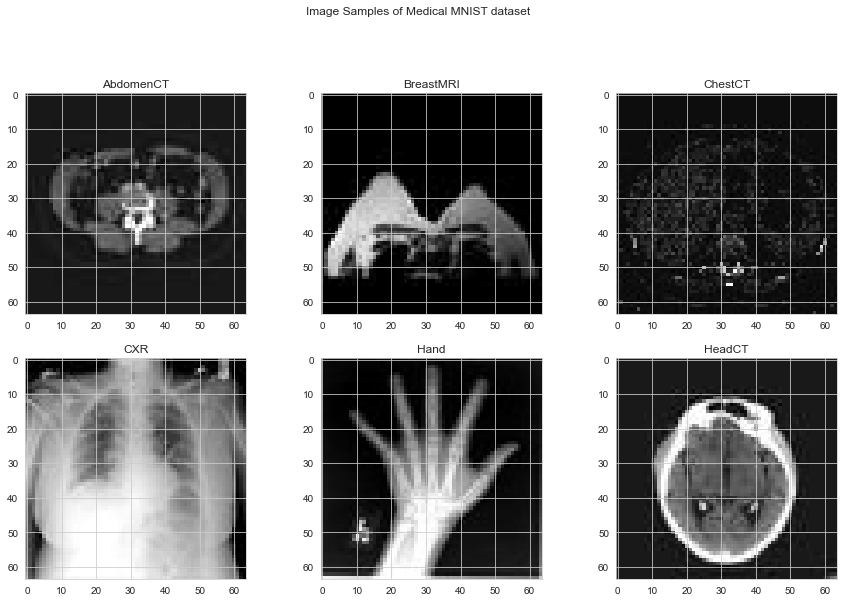

In [43]:
mnist.show_class_samples()

We observe that the images are grayscale images with a lot of noise. Hence, an Autoencoder can be used to denoise the images.